In [64]:
# Defining Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import Normalizer,StandardScaler
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor




In [65]:
#Loading boston dataset nad splitting in train and test

boston=load_boston()
df=pd.DataFrame(data=boston.data)
price=boston.target
X_train, X_test, y_train, y_test=train_test_split(df, price, test_size=0.3)

In [66]:
# Scaling data with standard scaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [67]:
# Convering data into arrays

X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [68]:
X_train[0]

array([ 0.31658112, -0.48796909,  0.97994742, -0.2511236 ,  0.47980336,
       -0.23587455,  0.59283099, -0.83105865,  1.65265009,  1.53051864,
        0.79727192, -3.67582241,  1.41635163])

In [69]:
#Sklearn SGD regressor

def SGDREG_sklearn(X_train,y_train,X_test,y_test,alpha,iteration):
    clf=SGDRegressor(alpha=alpha, learning_rate='constant', eta0=0.01, n_iter=iteration)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
    print("MSE on Our SGD regressor is",mse)
    return clf.coef_, clf.intercept_, mse

In [70]:
w_sgd, b_sgd, error_sgd=SGDREG_sklearn(X_train,y_train,X_test,y_test,alpha=.0001, iteration=1000)
print(w_sgd,b_sgd,error_sgd)

MSE on Our SGD regressor is 30.325691537161628
[-1.15866623  1.21595869  0.12748213  0.07693166 -1.6667176   2.81685428
 -0.84337904 -3.01816318  2.34482176 -1.68300632 -2.06367324  0.76539828
 -2.8689131 ] [22.15178694] 30.325691537161628


C:\Users\andy\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [71]:
#SGD scratch code

def SGDREG_scratch(X_train,y_train,X_test,y_test,alpha,iteration):
    w_new=np.zeros(shape=(1,13))
    b_new=0
    r=.01
    
    for i in range(iteration):
        w_old=w_new
        b_old=b_new
        w_=np.zeros(shape=(1,13))
        b_=0
        x=X_train
        y=y_train
        
        
        for i in range(150):  # for getting the derivatives using sgd with k=10
            y_curr=np.dot(w_old,x[i])+b_old
            w_+=x[i] * (y[i] - y_curr)
            b_+=(y[i]-y_curr)
            
            
        w_*=(-2/x.shape[0])
        b_*=(-2/x.shape[0])
        
        #updating the parameters
        w_new=(w_old-r*w_)
        b_new=(b_old-r*b_)
        
        
        y_pred=[]
    for i in range(len(X_test)):        
        y=np.asscalar(np.dot(w_new,X_test[i])+b_new)
 #       print(y)
        y_pred.append(y)
    y_pred=np.array(y_pred)
 #       print(y_pred)
 #       print(y_pred.shape)
    mse=mean_squared_error(y_pred=y_pred,y_true=y_test)
    return w_new, b_new,mse
    

In [72]:
w_new, b_new,mse=SGDREG_scratch(X_train,y_train,X_test,y_test,.0001,1000)

In [73]:
print(w_new, b_new,mse)

[[-1.09491772  0.57054931 -0.39907074  1.12551786 -0.41193448  4.72954726
  -0.73071285 -2.27012407  1.03229826 -1.44240454 -1.43691378  0.3773582
  -3.16919158]] [21.76632295] 35.07247703009148


In [74]:
# Comparision of target output from  SKLEARN and  SCRATCH

df=pd.DataFrame(data=[w_sgd,w_new[0]],index=['weights_sklearn','Weights_scratch'])
df.T

,weights_sklearn,Weights_scratch
0,-1.158666,-1.094918
1,1.215959,0.570549
2,0.127482,-0.399071
3,0.076932,1.125518
4,-1.666718,-0.411934
5,2.816854,4.729547
6,-0.843379,-0.730713
7,-3.018163,-2.270124
8,2.344822,1.032298
9,-1.683006,-1.442405


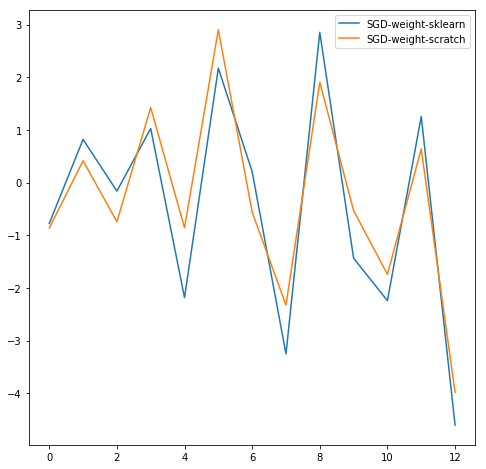

In [26]:
#Plotting weights between SKLEARN vs SCRATCH

plt.figure(figsize=(8,8))
plt.plot(w_sgd,label="SGD-weight-sklearn")
plt.plot(w_new[0],label="SGD-weight-scratch")
plt.legend()

plt.show()

In [58]:
#Comparison for MSE and Intercept SKLEARN vs SCRATCH

df1=pd.DataFrame(data={'intercept':(b_sgd[0],b_new[0]),'MSE':(error_sgd,mse)},index=['SKLEARN','SCRATCH'])
df1

,MSE,intercept
SKLEARN,21.471734,22.831567
SCRATCH,22.853128,22.993267


### Conclusion : We have sucessfully compared the results of sklearn sgd approach and written from scratch code.The plot shows the diff is not much for both wieghts and intercept

Code reference:https://github.com/anshuak100/Implement-SGD-to-Linear-Regression-on-Boston-house-prices-dataset/blob/master/sgd_imp_final.ipynb